In [1]:
# 加载模块
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# 加载数据(离散的点)
w1 = np.arange(-10, 10, 0.05)
w2 = np.arange(-10, 10, 0.05)
w1, w2 = np.meshgrid(w1, w2)

# 定义损失函数的函数值(离散的点)
loss = (2 - w1 - w2) ** 2 + (4 - 3 * w1 - w2) ** 2

##### 调用matplotlib模块中的绘图函数

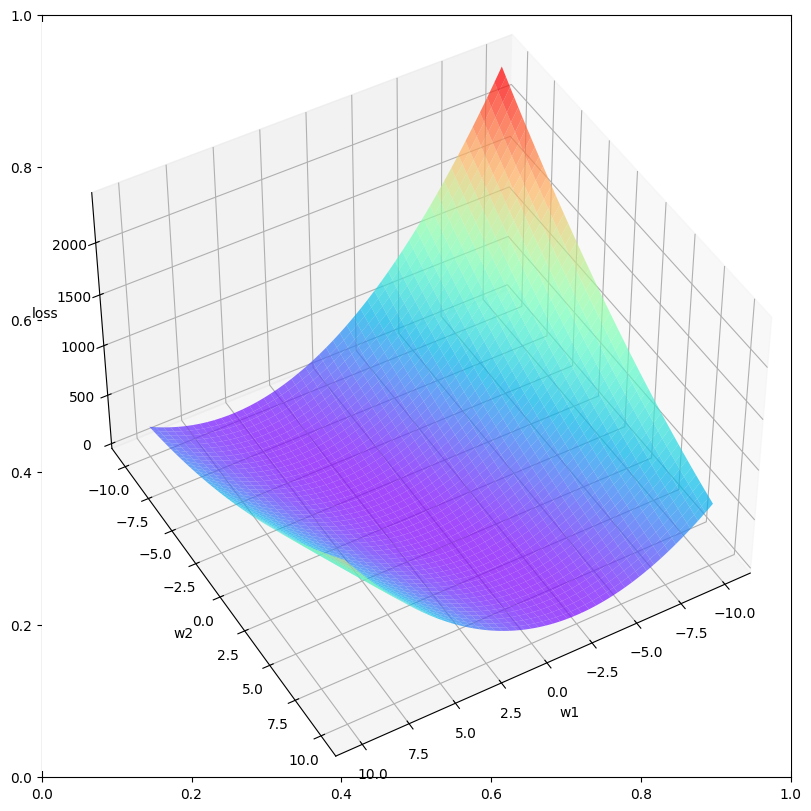

In [57]:
# 在计算机的内存中存储一个整数45 => 表示上下旋转的角度的数值大小
elev = 45
# 在计算机的内存中存储一个整数60 => 表示平行旋转的角度的数值大小
azim = 60
fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)
ax = plt.subplot(projection="3d")
ax.plot_surface(w1, w2, loss, cmap='rainbow', alpha=0.7)
ax.view_init(elev=elev, azim=azim)
# ax.xticks([-10, -5, 0, 5, 10])
ax.set_xlabel("w1", fontsize=10)
ax.set_ylabel("w2", fontsize=10)
ax.set_zlabel("loss", fontsize=10)
plt.show()

In [6]:
# def plot_3D(elev=45, azim=60, w1, w2):  # SyntaxError: non-default argument follows default argument
def plot_3D(elev=45, azim=60, x=w1, y=w2):
    loss = (2 - x - y) ** 2 + (4 - 3 * x - y) ** 2
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8), constrained_layout=True)
    ax = plt.subplot(projection="3d")
    ax.plot_surface(x, y, loss, cmap='rainbow', alpha=0.7)
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("w1", fontsize=10)
    ax.set_ylabel("w2", fontsize=10)
    ax.set_zlabel("loss", fontsize=10)
    plt.show()

In [8]:
from ipywidgets import interact, fixed
interact(plot_3D, elev=[0, 15, 30], azip=(-180, 180), x=fixed(w1), y=fixed(w2))
plt.show()

interactive(children=(Dropdown(description='elev', options=(0, 15, 30), value=0), IntSlider(value=60, descript…

In [9]:
# 加载模块
import torch

# 在计算机的内存中存储数值1.0 => 是自变量x的某一个取值
x = torch.tensor(1.0, dtype=torch.float32, requires_grad=True)
# 计算自变量x的平方, 在计算机的内存中存储计算结果 => 是因变量y的对应的取值
y = x ** 2

# 计算函数y等于x的平方, 在自变量x的取值为1的点处的导函数值
torch.autograd.grad(y, x)

(tensor(2.),)

In [10]:
# 加载模块
import torch
from torch import nn
from torch.nn import functional as F

In [11]:
# 设置随机数种子
torch.random.manual_seed(55)

# 加载数据
# 1.在计算机的内存中存储数值500 => 代表数据集中的样本的个数m
m = 500
# 2.在计算机的内存中存储数值20 => 代表数据集中的样本的特征变量的个数n
n = 20
# 3.在计算机的内存中一次性存储m*n个随机数 => 随机变量服从均匀分布, 代表特征矩阵X中的元素
X = torch.rand(size=(m, n), dtype=torch.float32) * 100
# 4.在计算机的内存中一次性存储m*1个随机数 => 随机变量服从均匀分布, 代表真实标签向量y中的元素
y = torch.randint(low=0, high=3, size=(m, 1), dtype=torch.float32)

In [12]:
# 搭建神经网络模型
class GeoffNet(nn.Module):
    # 构造器 + 类/对象属性:
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的各种层
    def __init__(self, in_features=10, out_features=2):
        super(GeoffNet, self).__init__()

        # 隐藏层第一层
        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=13, bias=True)
        # 隐藏层第二层
        self.hidden2_linear = nn.Linear(in_features=13, out_features=8, bias=True)
        # 输出层
        self.output_linear = nn.Linear(in_features=8, out_features=out_features, bias=True)
        
    # 方法:
    # => 数据集中样本的一次前向传播: 数据在神经网络模型中的各种层之间流动, 进行整合信息+加工信息
    def forward(self, X):
        # 输入层到隐藏层第一层
        # => 整合信息
        Z1 = self.hidden1_linear(X)
        # => 加工信息
        A1 = torch.relu(Z1)

        # 隐藏层第一层到隐藏层第二层
        # => 整合信息
        Z2 = self.hidden2_linear(A1)
        # => 加工信息
        A2 = torch.sigmoid(Z2)

        # 隐藏层第二层到输出层
        # => 整合信息
        Z3 = self.output_linear(A2)
        # => 加工信息
        # A3 = F.softmax(Z3, dim=1)
        return Z3

In [14]:
# 获取数据集中特征变量的个数
input_ = X.shape[1]
# 获取数据集中标签的分类个数
output_ = len(y.unique())

In [26]:
# 实例化模型
net = GeoffNet(in_features=input_, out_features=output_)

# 正向传播
output = net.forward(X)

In [27]:
output

tensor([[-0.4060, -0.6670,  0.0644],
        [-0.6728, -0.3367, -0.0905],
        [-0.5325, -0.3210,  0.0019],
        ...,
        [-0.6711, -0.3360, -0.0893],
        [-0.6724, -0.3363, -0.0902],
        [-0.6831, -0.3490, -0.0980]], grad_fn=<AddmmBackward0>)

In [28]:
# 计算当前损失函数的函数值
criterion = nn.CrossEntropyLoss()
loss = criterion(output, y.reshape(500).long())

In [29]:
loss

tensor(1.1060, grad_fn=<NllLossBackward0>)

In [33]:
# 反向传播
loss.backward()

In [21]:
net.hidden1_linear.weight.ndim

2

In [22]:
net.hidden1_linear.weight.shape

torch.Size([13, 20])

In [23]:
net.hidden1_linear.weight.grad

tensor([[ 7.6221e-03,  7.3304e-03,  1.9697e-02,  1.8574e-02,  1.0490e-02,
          1.2362e-02,  9.8692e-03,  1.0972e-02,  2.0019e-02,  1.4421e-02,
          3.3596e-03,  1.2494e-02,  1.4973e-02,  1.6754e-02,  8.8556e-03,
          1.3457e-02,  1.0146e-02,  1.6499e-02,  8.9676e-03,  1.2821e-02],
        [-1.2636e-03,  9.9595e-05,  3.4518e-03,  2.6377e-03, -1.4930e-03,
         -3.3543e-03, -1.0908e-03,  3.0621e-04, -1.6278e-05,  4.1937e-04,
         -1.2675e-03,  2.9639e-03,  1.4285e-03, -1.8054e-03,  1.8556e-03,
          3.1789e-04,  6.2674e-04, -3.4251e-03,  8.7047e-04, -1.9202e-03],
        [-2.8359e-04,  2.1231e-03,  1.9646e-03,  2.0968e-03,  7.9743e-04,
          2.4187e-03, -8.9512e-04,  9.0305e-04,  6.2647e-04,  1.0294e-03,
         -8.5465e-05, -1.8868e-03,  1.7495e-03,  1.9733e-03, -2.9805e-03,
          2.5237e-03, -1.2280e-04,  5.3007e-04,  2.4620e-03, -1.1867e-03],
        [ 2.3665e-02,  1.3695e-02,  1.3231e-02,  2.8141e-02,  1.9547e-02,
          2.1814e-02,  2.1226e-02, 

In [34]:
# 学习率: learning rate, lr
lr = 10

# 神经网络模型隐藏层第一层的模型的参数权重矩阵, 计算每一个参数的偏导函数的值
dw = net.hidden1_linear.weight.grad

In [35]:
dw

tensor([[-6.1656e-03, -5.7271e-03, -4.0309e-03, -3.5417e-03,  4.4736e-03,
         -6.9560e-03,  2.3858e-03, -1.7953e-03,  2.3635e-03, -1.9316e-03,
         -6.5093e-03, -2.3803e-03, -2.3654e-03, -2.9504e-03, -2.5673e-03,
         -2.8500e-03, -5.7079e-03, -1.7040e-03, -1.1924e-02, -6.3677e-03],
        [ 5.4321e-03,  7.4850e-03,  9.4128e-03,  5.7604e-03,  1.2449e-03,
          7.4944e-03,  4.0126e-03,  5.8950e-03,  4.5932e-03,  7.3780e-03,
          9.6871e-03,  8.2773e-03,  4.5425e-03,  8.1332e-03,  8.1163e-03,
          7.4121e-03,  9.4488e-03,  3.5932e-03,  1.2791e-02,  4.5777e-03],
        [-2.6749e-03, -1.7301e-03, -1.0246e-03, -4.6791e-04, -9.3761e-04,
          3.9252e-05, -2.8298e-03, -1.4902e-03, -1.9100e-03, -5.4425e-05,
         -3.5636e-03, -2.8072e-04,  5.4385e-04, -3.0728e-03, -4.4060e-03,
         -2.5695e-03,  2.3267e-04, -2.1159e-03, -7.9643e-04, -5.0975e-04],
        [-1.3727e-03, -8.8134e-05, -1.7552e-03, -3.3223e-03, -3.6293e-03,
         -3.3354e-03, -5.6813e-04, 

In [41]:
# 神经网络模型的隐藏层第一层的模型的参数 => 权重矩阵
w = net.hidden1_linear.weight.data

In [42]:
w

tensor([[ 0.1499,  0.0970,  0.0932,  0.0275, -0.1944, -0.1906, -0.1660, -0.0966,
         -0.1444,  0.0152, -0.0578,  0.1351,  0.0997, -0.0584,  0.1730,  0.1478,
         -0.0656,  0.1687, -0.1676,  0.1640],
        [ 0.0378,  0.2085, -0.0591,  0.1468, -0.1152, -0.0747,  0.1470,  0.2122,
         -0.1392, -0.1018, -0.1663,  0.0477, -0.0681,  0.2184,  0.0051, -0.2085,
         -0.1607,  0.1949,  0.1038,  0.1873],
        [ 0.1073, -0.0236, -0.1013, -0.0417, -0.0395, -0.1861,  0.1218, -0.1465,
          0.0525, -0.0601,  0.1412, -0.0209, -0.1844,  0.1299, -0.1563, -0.1540,
          0.2090,  0.0024, -0.1414, -0.0066],
        [ 0.1114, -0.1955,  0.1967, -0.1439, -0.0345,  0.1900, -0.0348, -0.0527,
          0.1598,  0.0655,  0.0250, -0.1119,  0.0305,  0.0837, -0.1874, -0.2170,
         -0.1694,  0.0303,  0.0621, -0.2168],
        [-0.0363,  0.1098,  0.1883, -0.1169,  0.0338, -0.1964, -0.0621,  0.0756,
          0.0731,  0.0171, -0.1967, -0.0920, -0.1324,  0.0892,  0.0652, -0.1720,
      

In [43]:
# 根据梯度信息, 使得当前层的模型的参数朝着能减小损失函数的函数值的方向, 更新当前层的权重
w = w - lr * dw

In [44]:
w

tensor([[ 0.2116,  0.1543,  0.1335,  0.0629, -0.2392, -0.1210, -0.1899, -0.0787,
         -0.1681,  0.0345,  0.0073,  0.1589,  0.1233, -0.0289,  0.1987,  0.1763,
         -0.0085,  0.1858, -0.0483,  0.2277],
        [-0.0165,  0.1337, -0.1532,  0.0892, -0.1277, -0.1496,  0.1068,  0.1533,
         -0.1851, -0.1756, -0.2632, -0.0351, -0.1136,  0.1371, -0.0760, -0.2826,
         -0.2552,  0.1590, -0.0241,  0.1415],
        [ 0.1340, -0.0063, -0.0910, -0.0370, -0.0301, -0.1865,  0.1501, -0.1316,
          0.0716, -0.0596,  0.1768, -0.0181, -0.1899,  0.1607, -0.1122, -0.1283,
          0.2067,  0.0236, -0.1334, -0.0015],
        [ 0.1252, -0.1946,  0.2143, -0.1106,  0.0018,  0.2233, -0.0292, -0.0410,
          0.1758,  0.0784,  0.0439, -0.1040,  0.0727,  0.1054, -0.1696, -0.2006,
         -0.1606,  0.0330,  0.0831, -0.2304],
        [-0.0441,  0.0860,  0.1701, -0.1420,  0.0329, -0.1714, -0.0669,  0.0727,
          0.0539,  0.0028, -0.2160, -0.0919, -0.1409,  0.0980,  0.0529, -0.1875,
      

In [49]:
# 设置对动量向量学习的参数gamma, 对梯度向量学习的参数eta
eta = 0.1
gamma = 0.9

# 获取神经网络模型的隐藏层第一层的权重矩阵对应的梯度矩阵
dw = net.hidden1_linear.weight.grad

# 获取神经网络模型的隐藏层第一层的权重矩阵
w = net.hidden1_linear.weight.data

In [50]:
w

tensor([[ 0.1499,  0.0970,  0.0932,  0.0275, -0.1944, -0.1906, -0.1660, -0.0966,
         -0.1444,  0.0152, -0.0578,  0.1351,  0.0997, -0.0584,  0.1730,  0.1478,
         -0.0656,  0.1687, -0.1676,  0.1640],
        [ 0.0378,  0.2085, -0.0591,  0.1468, -0.1152, -0.0747,  0.1470,  0.2122,
         -0.1392, -0.1018, -0.1663,  0.0477, -0.0681,  0.2184,  0.0051, -0.2085,
         -0.1607,  0.1949,  0.1038,  0.1873],
        [ 0.1073, -0.0236, -0.1013, -0.0417, -0.0395, -0.1861,  0.1218, -0.1465,
          0.0525, -0.0601,  0.1412, -0.0209, -0.1844,  0.1299, -0.1563, -0.1540,
          0.2090,  0.0024, -0.1414, -0.0066],
        [ 0.1114, -0.1955,  0.1967, -0.1439, -0.0345,  0.1900, -0.0348, -0.0527,
          0.1598,  0.0655,  0.0250, -0.1119,  0.0305,  0.0837, -0.1874, -0.2170,
         -0.1694,  0.0303,  0.0621, -0.2168],
        [-0.0363,  0.1098,  0.1883, -0.1169,  0.0338, -0.1964, -0.0621,  0.0756,
          0.0731,  0.0171, -0.1967, -0.0920, -0.1324,  0.0892,  0.0652, -0.1720,
      

In [46]:
# 在计算机的内存中一次性存储多个数值0 => 选择张量作为存储结构
v = torch.zeros(size=(dw.shape[0], dw.shape[1]))

##### 动量向量和梯度向量结合的权重更新方法

In [53]:
v = gamma * v - eta * dw
w = w - v

In [54]:
w

tensor([[ 0.1471,  0.0944,  0.0914,  0.0258, -0.1924, -0.1938, -0.1649, -0.0975,
         -0.1433,  0.0143, -0.0608,  0.1340,  0.0986, -0.0598,  0.1718,  0.1464,
         -0.0682,  0.1679, -0.1731,  0.1611],
        [ 0.0403,  0.2120, -0.0547,  0.1494, -0.1146, -0.0712,  0.1488,  0.2150,
         -0.1371, -0.0984, -0.1618,  0.0515, -0.0660,  0.2222,  0.0089, -0.2051,
         -0.1563,  0.1966,  0.1097,  0.1894],
        [ 0.1060, -0.0244, -0.1018, -0.0419, -0.0399, -0.1861,  0.1205, -0.1472,
          0.0516, -0.0602,  0.1396, -0.0210, -0.1842,  0.1285, -0.1583, -0.1552,
          0.2091,  0.0015, -0.1418, -0.0068],
        [ 0.1108, -0.1955,  0.1959, -0.1454, -0.0362,  0.1884, -0.0351, -0.0533,
          0.1590,  0.0650,  0.0241, -0.1122,  0.0286,  0.0827, -0.1882, -0.2178,
         -0.1698,  0.0302,  0.0611, -0.2162],
        [-0.0360,  0.1109,  0.1892, -0.1158,  0.0339, -0.1975, -0.0619,  0.0757,
          0.0740,  0.0177, -0.1958, -0.0921, -0.1320,  0.0888,  0.0658, -0.1713,
      

In [55]:
# 获取神经网络模型的隐藏层的第一层的参数 => 权重矩阵和偏置值标量
type(net.hidden1_linear.weight)

torch.nn.parameter.Parameter

In [56]:
# 获取神经网络模型的隐藏层的第一层, 隐藏层的第二层和输出层的参数 => 权重矩阵和偏置值标量
params = (net.hidden1_linear.weight, net.hidden2_linear.weight, net.output_linear.weight)
len(params)

3

In [57]:
# 加载模块
import torch  # 提供核心数据结构-张量以及基于张量的mathematical operations
import torch.nn as nn  # 提供完整的层, 层上已经内置了整合信息的计算流程
from torch.nn import functional as F  # 提供独立的整合信息以及加工信息的计算流程
import torch.optim as optim

In [96]:
# 设置随机数发生器中的随机数种子
torch.random.manual_seed(55)

# 加载数据
# 1.数据集中训练样本的个数
m = 500
# 2.数据集中每一个训练样本的特征变量的个数
n = 20
# 3.合成数据集, 假设数据集中所有的观测值服从[0, 1)的均匀分布(连续型)
X = torch.rand(size=(m, n), dtype=torch.float32) * 100
# 4.合成真实标签, 假设数据集中所有的观测值服从[0, 1, 2]的均匀分布(离散型)
y = torch.randint(low=0, high=3, size=(m, 1), dtype=torch.float32)

In [59]:
X.ndim

2

In [60]:
X.shape

torch.Size([500, 20])

In [62]:
y.unique()

tensor([0., 1., 2.])

In [63]:
len(y.unique())

3

In [64]:
# 从数据集中获取特征变量的个数, 以确定输入层神经元的个数
input_ = X.shape[1]
# 从数据集中获取分类的标签个数, 以确定输出层神经元的个数
output_ = len(y.unique())

In [110]:
# 搭建神经网络模型
class GeoffNet(nn.Module):
    # 构造器 + 类/对象属性
    # => 子类的对象调用父类的构造器
    # => 神经网络模型中的层
    def __init__(self, in_features=10, out_features=2):
        super(GeoffNet, self).__init__()

        # 隐藏层的第一层
        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=13, bias=True)
        # 隐藏层的第二层
        self.hidden2_linear = nn.Linear(in_features=13, out_features=8, bias=True)
        # 输出层
        self.output_linear = nn.Linear(in_features=8, out_features=out_features, bias=True)

        
    # 方法
    # => 前向传播: 数据从神经网络的输入层 -> 隐藏层 -> 输出层; 逐层完成整合信息+加工信息
    def forward(self, X):
        # 输入层到隐藏层的第一层
        # 1.整合信息
        Z1 = self.hidden1_linear(X)
        # 2.加工信息
        A1 = torch.relu(Z1)

        # 隐藏层的第一层到隐藏层的第二层
        # 1.整合信息
        Z2 = self.hidden2_linear(A1)
        # 2.加工信息
        A2 = torch.sigmoid(Z2)

        # 隐藏层的第二层到输出层
        # 1.整合信息
        Z3 = self.output_linear(A2)
        # 2.加工信息
        # A3 = F.softmax(Z3, dim=1)

        return Z3

In [111]:
# 设置随机数发生器中的随机数种子
torch.manual_seed(55)

# 实例化神经网络模型, 测试前向传播过程的正确性
net = GeoffNet(in_features=input_, out_features=output_)
Z_hat = net.forward(X)

In [112]:
net.hidden1_linear.weight[0]

tensor([ 0.1501,  0.1958,  0.1091,  0.0302,  0.1646, -0.0105, -0.1852,  0.1226,
         0.2092, -0.1398, -0.1792, -0.1963,  0.1491,  0.1268,  0.0097,  0.1343,
         0.1060, -0.0839, -0.0479, -0.0836], grad_fn=<SelectBackward0>)

In [98]:
net.parameters()

<generator object Module.parameters at 0x131f4ab20>

In [99]:
Z_hat.ndim

2

In [100]:
Z_hat.shape

torch.Size([500, 3])

In [101]:
# 选择损失函数, 计算以当前模型的参数进行学习得到的预测结果与真实观测值之间的误差
criterion = nn.CrossEntropyLoss()
# RuntimeError: 0D or 1D target tensor expected, multi-target not supported
# RuntimeError: expected scalar type Long but found Float
loss = criterion(Z_hat, y.reshape(m).long())  # 在此过程中, 完整的计算图被构建, 计算图中明确了哪些是模型的参数, 哪些是中间计算变量, 哪些是观测值

In [102]:
loss

tensor(1.2400, grad_fn=<NllLossBackward0>)

In [103]:
# 反向传播: 计算每一个模型的参数(损失函数中的自变量而非中间变量)的偏导函数表达式在当前模型参数值给定处的偏导函数值
loss.backward()

In [104]:
# 选择一种优化器optimizer, 使用某种基于梯度的方式来更新当前模型的参数, 使得损失函数的值是减小的
eta = 0.1  # 对梯度向量中的各个标量的学习的程度
gamma = 0.9  # 对动量向量中的各个标量的学习的程度

optimizer = optim.SGD(params=net.parameters(), lr=eta, momentum=gamma)
# 将存储在优化器中的params对应的模型中的全部参数按照迭代公式进行更新
optimizer.step()
# 清楚存储在优化器中的params对应的模型中的全部参数各自对应的偏导函数的函数值, 即梯度向量(矩阵). 保留动量向量(矩阵)
optimizer.zero_grad()

In [105]:
loss

tensor(1.2400, grad_fn=<NllLossBackward0>)

In [107]:
net.hidden1_linear.weight.ndim

2

In [108]:
net.hidden1_linear.weight.shape

torch.Size([13, 20])

In [109]:
net.hidden1_linear.weight[0]

tensor([ 0.1513,  0.1963,  0.1103,  0.0311,  0.1661, -0.0095, -0.1841,  0.1237,
         0.2101, -0.1387, -0.1771, -0.1950,  0.1499,  0.1285,  0.0113,  0.1359,
         0.1081, -0.0831, -0.0464, -0.0826], grad_fn=<SelectBackward0>)

##### torch.utils.data模块中的TensorDataset类

In [113]:
# 加载模块
import torch
from torch.utils.data import TensorDataset

# 加载数据集
a = torch.randn(size=(500, 2, 3))  # 三维张量, e.g. 文字数据
b = torch.randn(size=(500, 3, 4, 5))  # 四维张量, e.g. 图像数据
c = torch.randn(size=(500, 1))  # 二维张量, e.g. 真实标签

In [115]:
# 合并三个张量, 存储到元组中
TensorDataset(a, b, c)[0]

(tensor([[-0.2858,  2.8201,  1.3519],
         [-1.6990, -0.0617, -0.2209]]),
 tensor([[[ 0.6766, -0.4315, -0.3294,  0.4498, -0.5174],
          [-1.1869, -0.1065, -0.5182,  0.8793, -0.7696],
          [ 0.2181,  0.5161, -0.0354,  1.2498, -2.6545],
          [-1.5676,  0.6688,  1.1014,  0.3665, -0.3412]],
 
         [[-0.2729, -0.3923, -0.0880, -0.3500,  1.7733],
          [-1.2518,  0.0567,  0.2328,  0.4985, -1.4332],
          [ 0.6159,  0.4591,  1.1393,  0.0655, -1.6908],
          [ 0.0903,  0.4565, -0.6890,  0.1413, -0.3338]],
 
         [[-1.5377,  0.5487, -0.2476, -1.5772,  0.7569],
          [ 1.3593, -0.4380, -2.4760, -0.0039, -1.3392],
          [-0.7591, -0.0597,  0.1059,  0.0909,  0.2789],
          [-0.3420, -0.3546, -0.6219, -0.6991,  0.7052]]]),
 tensor([0.6722]))

In [116]:
# 合并两个张量, 存储到元组中
TensorDataset(a, c)[0]

(tensor([[-0.2858,  2.8201,  1.3519],
         [-1.6990, -0.0617, -0.2209]]),
 tensor([0.6722]))

In [117]:
c = torch.randn(size=(300, 1))
TensorDataset(a, c)[0]

AssertionError: Size mismatch between tensors

##### 使用torch.utils.data模块中的DataLoader类

In [120]:
# 加载模块
import torch
from torch.utils.data import DataLoader
import numpy as np

# DataLoader类将一个完整的数据集和一个sampler采样器结合, 返回一个可以使用for循环迭代的数据集
# dataset参数: from which dataset to load the data
DataLoader(dataset=np.random.randn(5, 2))

In [121]:
for i in DataLoader(dataset=np.random.randn(5, 2)):
    print(i)

tensor([[ 0.6222, -1.9058]], dtype=torch.float64)
tensor([[ 1.4070, -1.3821]], dtype=torch.float64)
tensor([[0.6383, 0.4954]], dtype=torch.float64)
tensor([[-0.0786, -1.4372]], dtype=torch.float64)
tensor([[0.3272, 1.5411]], dtype=torch.float64)


In [123]:
for i in DataLoader(dataset=torch.randn(size=(5, 2), dtype=torch.float32)):
    print(i.dtype)

torch.float32
torch.float32
torch.float32
torch.float32
torch.float32


In [125]:
# DataLoader类将一个完整的数据集和一个sampler采样器结合, 返回一个可以使用for循环迭代的数据集
# dataset参数: from which dataset to load the data
dataset = torch.randn(size=(500, 2), dtype=torch.float32)
# batch_size参数: how many samples per batch to load. 一个batch中有多少个样本, 默认值是1
batch_size = 120
# shuffle参数: data reshuffled at every epoch. 一个epoch是对数据集完整学习一次
shuffle = True
# drop_last参数: 如果完整数据集中的样本个数不能够被一个从完整数据集中采样得到的一个子集的样本个数整除, 则会导致最后一次批次的样本数小于其它批次, 此时是否保留
drop_last = True

# 加载模块
from torch.utils.data import DataLoader

data = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

for i in data:
    # print(i.shape)
    print(i)

tensor([[-1.2182,  0.5360],
        [-0.1026,  1.2520],
        [-0.0312,  1.8149],
        [-0.8547, -0.6863],
        [-0.6760, -0.2058],
        [-0.3684,  0.7149],
        [ 0.2729,  0.5319],
        [ 0.3586, -2.0325],
        [-0.7680,  1.5523],
        [ 0.8614,  0.4695],
        [ 0.2735, -1.3223],
        [-0.0276,  1.0278],
        [ 0.3379,  0.5598],
        [-0.8305,  0.6176],
        [-1.2789,  0.8245],
        [-0.2382, -0.1105],
        [-0.1847, -1.6229],
        [-0.7647, -0.3882],
        [ 0.5774,  0.7819],
        [ 0.2623,  0.5094],
        [ 0.1762, -2.2478],
        [ 1.3318,  0.0388],
        [ 1.0633,  0.9030],
        [ 2.1416, -0.4458],
        [-1.1914,  1.3511],
        [ 0.9342, -0.5170],
        [ 0.7275, -0.2317],
        [ 0.6131,  1.1553],
        [-0.4223,  0.0427],
        [ 0.4291,  1.1284],
        [ 0.1257,  1.4430],
        [-0.7887,  0.7971],
        [-0.9257, -2.4742],
        [ 0.7948,  0.8767],
        [-0.4775,  1.7225],
        [-0.1826, -1

##### 结合使用TensorDataset和DataLoader
###### 1.使用TensorDataset将特征张量(任意维度)和真实标签"打包"存储在元组中, 得到完整的数据集
###### 2.使用DataLoader将完整的数据集进行批量划分

In [126]:
# 加载模块
from torch.utils.data import TensorDataset, DataLoader

# 设置随机数发生器中的随机数种子
torch.manual_seed(55)

# 加载数据集
# 1.数据集中样本的个数m
m = 5 * pow(10, 4)
# 2.数据集中的每一个样本的特征变量的个数
n = 20
# 3.随机生成特征张量X, 指定张量的维度和形状. 随机数服从[0, 1)的连续性均匀分布
X = torch.rand(size=(m, n), dtype=torch.float32)
# 4.随机生成真实标签y, 指定张量的维度和形状. 随机数服从[0, 1, 2]的离散型均匀分布
y = torch.randint(low=0, high=3, size=(m, 1), dtype=torch.float32)

In [130]:
# 使用TensorDataset将特征张量和真实标签打包存储在一个可迭代的对象中, 按照样本索引打包
dataset = TensorDataset(X, y)
# dataset[0]

# 使用DataLoader将完整的数据集进行批次划分, 每一个批次是互不相交的
# 1.设置一个批次的大小, 即从完整数据集中采样得到的每一个子集的大小
batch_size = 4000
# 2.设置是否不同的epoch, 即不同次完整学习数据集时, 每一个子集要重新打乱划分
shuffle = True
# 3.设置如果完整数据集的大小无法整除子集的大小而导致最后一个批次中的样本数少的时候, 是否保留最后一个批次
drop_last = False
batched_dataset = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

In [132]:
# 查看完整数据集按照指定子集大小能够划分为多少个批次, 批次和批次之间的样本是不重复的, 相互独立的
# type(batched_dataset)
len(batched_dataset)

13

In [134]:
# 访问DataLoader类的对象的成员变量/属性 dataset
# batched_dataset.dataset
len(batched_dataset.dataset)

50000

In [135]:
# 查看数据集中的第一个样本的特征张量和真实标签
batched_dataset.dataset[0]

(tensor([0.8357, 0.9378, 0.7439, 0.5674, 0.8682, 0.4765, 0.0858, 0.7740, 0.9677,
         0.1874, 0.0993, 0.0611, 0.8334, 0.7835, 0.5216, 0.8003, 0.7370, 0.3124,
         0.3930, 0.3130]),
 tensor([0.]))

In [136]:
# 查看特征张量
batched_dataset.dataset[0][0]

tensor([0.8357, 0.9378, 0.7439, 0.5674, 0.8682, 0.4765, 0.0858, 0.7740, 0.9677,
        0.1874, 0.0993, 0.0611, 0.8334, 0.7835, 0.5216, 0.8003, 0.7370, 0.3124,
        0.3930, 0.3130])

In [137]:
# 查看真实标签
batched_dataset.dataset[0][1]

tensor([0.])

In [138]:
# 访问DataLoader类的对象的成员变量/属性batch_size
batched_dataset.batch_size

4000

In [140]:
len(enumerate(batched_dataset))

TypeError: object of type 'enumerate' has no len()

In [142]:
# batch_idx: 将完整的数据集分为若干互不相交的子集时, 当前使用的子集的索引
# (X, y): 当前子集中的样本个数对应的特征张量和真实标签
for batch_idx, (X, y) in enumerate(batched_dataset):
    # 1.获取当前数据集中每一个样本的特征变量的个数. e.g. 使用的是普通的线性层
    # input_ = X.shape[1]
    # 2.获取当前数据集中样本的不同分类标签的数量
    # output_ = len(y.unique())
    
    # 1.实例化模型, 进行前向传播, 计算模型预测输出标记
    # net = GeoffNet(in_features=input_, out_features=output_)
    # output = net.forward(X)
    # 2.选择损失函数(模型性能评估函数), 计算模型预测输出标记与真实标签之间的误差
    # criterion = nn.CrossEntropyLoss()
    # loss = criterion(output, y)
    # 3.在损失函数计算的过程中, 计算图会被完整实现. 进行反向传播, 计算每一个模型的参数的偏导函数在当前模型参数取值下的函数值
    # loss.backward()
    # 4.选择优化器(不同的方式更新模型的参数), 以使得损失函数的值较当前损失函数的值是减小的
    # opitimizer = optim.SGD(params=net.parameters(), lr=eta, momentum=gamma)
    # => 使用优化器更新参数
    # opitimizer.step()
    # => 使用优化器清除模型中已经使用过的所有梯度向量
    # opitimizer.zero_grad()
    if batch_idx == 2:
        break

    print(X.shape)
    print(y.shape)
    print(X, y)

torch.Size([4000, 20])
torch.Size([4000, 1])
tensor([[0.6754, 0.6772, 0.5854,  ..., 0.1940, 0.4931, 0.9538],
        [0.0291, 0.9712, 0.7609,  ..., 0.5626, 0.9666, 0.0021],
        [0.8352, 0.5457, 0.4066,  ..., 0.2945, 0.0602, 0.6153],
        ...,
        [0.3209, 0.3438, 0.5692,  ..., 0.0941, 0.1950, 0.4667],
        [0.0275, 0.8551, 0.4493,  ..., 0.5651, 0.7886, 0.0743],
        [0.5964, 0.7657, 0.5618,  ..., 0.1402, 0.6134, 0.3714]]) tensor([[1.],
        [1.],
        [2.],
        ...,
        [1.],
        [0.],
        [2.]])
torch.Size([4000, 20])
torch.Size([4000, 1])
tensor([[0.2013, 0.7717, 0.1865,  ..., 0.2643, 0.8486, 0.9676],
        [0.8548, 0.8377, 0.2385,  ..., 0.9895, 0.2869, 0.4873],
        [0.8763, 0.1922, 0.2930,  ..., 0.9984, 0.0729, 0.4765],
        ...,
        [0.4861, 0.8702, 0.8135,  ..., 0.4769, 0.8101, 0.5817],
        [0.3982, 0.1553, 0.2641,  ..., 0.0111, 0.9658, 0.2898],
        [0.0368, 0.6357, 0.8191,  ..., 0.0806, 0.3109, 0.8947]]) tensor([[1.],
  

##### 加载Scikit-learn中的数据集

In [144]:
# 加载模块
import sklearn
from sklearn.datasets import load_breast_cancer as LBC

lbc_data = LBC()

In [156]:
# 查看从Scikit-learn中下载的表格型数据集的特征矩阵部分
# type(lbc_data.data)
# lbc_data.data.ndim
lbc_data.data.shape
# lbc_data.data

(569, 30)

In [155]:
# 查看从Scikit-learn中下载的表格型数据集的标签部分
# type(lbc_data.target)
# lbc_data.target.ndim
lbc_data.target.shape
# lbc_data.target

(569,)

In [157]:
X = torch.tensor(lbc_data.data, dtype=torch.float32)
y = torch.tensor(lbc_data.target, dtype=torch.float32)

# 将特征张量和标签按照样本索引进行打包得到完整的数据集, 存储在元组中
dataset = TensorDataset(X, y)
# 将完整的数据集划分为若干个互不相交的子集, 叫做batch
batch_size = 5
shuffle = True  # 和epoch相关
drop_last = False
batched_dataset = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

# 按照批次进行学习
for (X, y) in batched_dataset:
    print(X.shape)
    print(y.shape)

    break

torch.Size([5, 30])
torch.Size([5])


##### 加载存储在计算机外存(文件系统)中的文件中的数据集

In [158]:
# 加载模块
import pandas as pd
import numpy as np

# 加载数据
file_path = "./creditcard.csv"
credicard_data = pd.read_csv(filepath_or_buffer=file_path)

In [159]:
type(credicard_data)

pandas.core.frame.DataFrame

In [160]:
credicard_data.shape

(284807, 31)

In [161]:
credicard_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [163]:
# 从DataFrame类的对象中拆分特征矩阵和真实标签
type(credicard_data.iloc)

pandas.core.indexing._iLocIndexer

In [164]:
type(credicard_data.iloc[:, :-1])

pandas.core.frame.DataFrame

In [165]:
credicard_data.iloc[:, -1]

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [166]:
type(credicard_data.iloc[:, -1])

pandas.core.series.Series

In [169]:
# np.array(credicard_data.iloc[:, :-1])
X = torch.tensor(np.array(credicard_data.iloc[:, :-1]), dtype=torch.float32)
y = torch.tensor(np.array(credicard_data.iloc[:, -1]), dtype=torch.float32)

In [213]:
# 使用TensorDataset将特征张量和真实标签打包存储在元组中, 形成完整的数据集
dataset = TensorDataset(X, y)
# 使用DataLoader将完整的数据集按照指定的大小划分为若干个互不相交的批次
batch_size = 1000
shuffle = True
drop_last = False
batched_dataset = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=shuffle, drop_last=drop_last)

for (X, y) in batched_dataset:
    print(X.dtype)
    print(y.dtype)

    break

torch.uint8
torch.int64


##### 基础的神经网络模型训练过程

In [172]:
# 加载模块
import torch
# =====> 第一部分: 数据
from torch.utils.data import TensorDataset, DataLoader
# =====> 第二部分: 搭建神经网络模型
import torch.nn as nn  # 提供搭建深度神经网络模型需要使用的层(内置整合信息的方法)
from torch.nn import functional as F  # 提供各种整合信息和加工信息的方法
# =====> 第三部分: 训练神经网络模型
from torch import optim

In [177]:
# 加载数据
import torchvision
import torchvision.transforms as transforms

root = "../datasets/FashionMNIST/"
mnist = torchvision.datasets.FashionMNIST(root=root, train=True, download=True, transform=transforms.ToTensor())

100.0%


Extracting ../datasets/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../datasets/FashionMNIST/FashionMNIST/raw



100.0%


Extracting ../datasets/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/FashionMNIST/raw



100.0%


Extracting ../datasets/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../datasets/FashionMNIST/FashionMNIST/raw



100.0%

Extracting ../datasets/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../datasets/FashionMNIST/FashionMNIST/raw



In [178]:
type(mnist)

torchvision.datasets.mnist.FashionMNIST

In [179]:
# 查看FashionMNIST对应的训练数据集中样本的个数
len(mnist)

60000

In [181]:
# 查看训练数据集中的特征张量
mnist.data.shape

torch.Size([60000, 28, 28])

In [184]:
# 查看训练数据集中的真实标签
mnist.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [185]:
# 查看训练数据集中的真实标签对应的具体类别
mnist.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [193]:
# mnist[0][0].shape  # torch.Size([1, 28, 28])
# mnist[0][0].view(28, 28).shape  # torch.Size([28, 28])
mnist[0][0].view(28, 28).numpy()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

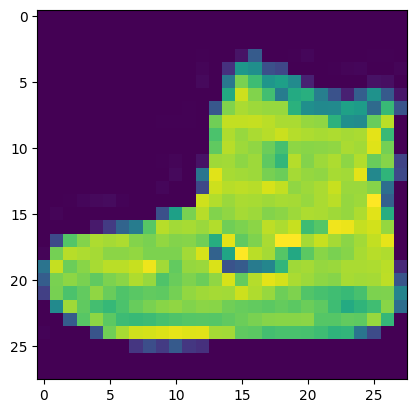

In [194]:
# 查看数字图像(digital image)对应的图片(picture)
import matplotlib.pyplot as plt

plt.imshow(mnist[0][0].view(28, 28).numpy())

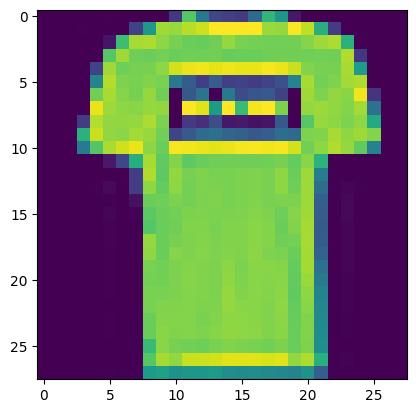

In [195]:
plt.imshow(mnist[1][0].view(28, 28).numpy())

In [226]:
# 使用TensorDataset将特征张量(任意维度)和对应的真实标签进行合并, 只要两个张量的第一个维度即样本数目一致即可
X = mnist.data
y = mnist.targets
dataset = TensorDataset(X, y)

# 使用DataLoader将一个完整的数据集分为若干互不相交的子集, 子集的大小是相同的
batch_size = 128
batched_dataset = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [216]:
X.dtype

torch.uint8

In [217]:
X.float().dtype

torch.float32

In [197]:
# 查看一个完整的数据集可以划分为多少个互不相交的子集
len(batched_dataset)

469

In [198]:
for (X, y) in batched_dataset:
    print(X.shape)
    print(y.shape)
    break

torch.Size([128, 28, 28])
torch.Size([128])


In [202]:
mnist.data.shape

torch.Size([60000, 28, 28])

In [207]:
# 对于图像数据集, 通常是四维张量: 样本个数 颜色通道数 高度height 宽度width
# 确定输入层神经元的个数 => 一个样本的特征变量的个数
# input_ = mnist.data[0].numel()
input_ = mnist.data.shape[1] * mnist.data.shape[2]

# 确定输出层神经元的个数 => 真实分类标签中不同类别的标签的数量
output_ = len(mnist.targets.unique())

In [208]:
input_

784

In [209]:
output_

10

##### 搭建深度神经网络模型

In [221]:
class GeoffNet(nn.Module):
    # 构造器 + 类/成员属性
    # => 子类的对象调用父类的构造器
    # => 深度神经网络模型的层
    def __init__(self, in_features=10, out_features=2):
        super(GeoffNet, self).__init__()
        
        # 数据的归一化层
        self.normalize = nn.BatchNorm2d(num_features=1)
        # 隐藏层第一层
        self.hidden1_linear = nn.Linear(in_features=in_features, out_features=128, bias=False)
        # 输出层
        self.output_linear = nn.Linear(in_features=128, out_features=out_features, bias=False)
    
    # 方法
    # => 前向传播: 数据从输入层 -> 隐藏层 -> 输出层, 逐层完成整合信息+加工信息
    def forward(self, X):
        X = self.normalize(X)
        # 将二维的图像数据压平为一维的线性数据
        X = X.view(-1, 28*28)
        
        # 输入层到隐藏层第一层
        # 整合信息
        Z1 = self.hidden1_linear(X)
        # 加工信息
        A1 = torch.relu(Z1)

        # 隐藏层第一层到输出层
        # 整合信息
        Z2 = self.output_linear(A1)
        # 加工信息
        A2 = F.log_softmax(Z2, dim=1)
        return A2

#### 搭建深度神经网络模型训练框架
##### 1.选择合适的损失函数用来评估模型的预测输出标记和真实标签的误差, 计算损失
##### 2.选择合适的优化器用来更新模型的参数, 以期更快速更稳定的让损失函数的函数值减小

In [224]:
def fit(dataset, model, lr=0.01, gamma=0, epochs=5):
    """
    dataset: 已经按照给定的子集大小进行批处理化的完整数据集
    model: 深度神经网络模型
    epochs: 将批处理化的完整的数据集学习的次数
    """
    # 选择损失函数
    criterion = nn.NLLLoss()
    # 选择优化器
    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=gamma)

    correct = 0
    samples = 0

    for epoch in range(epochs):  # 将完整的数据集学习的遍数
        for batch_idx, (X, y) in enumerate(dataset):  # 每一次学习完整的数据集由学习各个子集的阶段组成
            y = y.view(X.shape[0])
            X = X.reshape(128, 1, 28, 28)
            # 1.前向传播, 计算模型预测的输出标记
            output = model.forward(X.float())
            # 2.计算模型预测的输出标记和观测的真实标签之间的误差并且构建完整的计算图
            loss = criterion(output, y)
            # 3.反向传播, 计算模型中所有参数在当前参数取值下的偏导函数的函数值
            loss.backward()
            # 4.=>使用优化器更新模型中所有的参数
            optimizer.step()
            # 4.=>使用优化器清除已经使用过的梯度信息
            optimizer.zero_grad()

            # 计算分类准确率
            y_hat = torch.max(output, 1)[1]
            correct = correct + torch.sum(y_hat == y)
            samples = samples + X.shape[0]

            if ((batch_idx+1) % 125 == 0) or (batch_idx == len(dataset)-1):
                print("Epoch{}:[{}/{}({:.0f}%)]\tLoss:{:.6f}\t Accuracy: {:.3f}".format(
                    epoch+1,
                    samples,
                    len(dataset.dataset)*epochs,
                    100*samples/(len(dataset.dataset)*epochs),
                    loss.data.item(),
                    float(correct*100)/samples
                ))

In [227]:
# 设置随机数发生器中的随机数种子
torch.manual_seed(55)

# 实例化深度神经网络模型
net = GeoffNet(in_features=input_, out_features=output_)

# 使用搭建好的深度神经网络模型训练框架进行训练
lr = 0.15
gamma = 0
epochs = 10
fit(model=net, dataset=batched_dataset, epochs=epochs, lr=lr, gamma=gamma)

Epoch1:[16000/600000(3%)]	Loss:0.600207	 Accuracy: 74.062
Epoch1:[32000/600000(5%)]	Loss:0.412412	 Accuracy: 77.809
Epoch1:[48000/600000(8%)]	Loss:0.455946	 Accuracy: 79.735
Epoch1:[59904/600000(10%)]	Loss:0.309904	 Accuracy: 80.697
Epoch2:[75904/600000(13%)]	Loss:0.427047	 Accuracy: 81.624
Epoch2:[91904/600000(15%)]	Loss:0.406549	 Accuracy: 82.381
Epoch2:[107904/600000(18%)]	Loss:0.381105	 Accuracy: 83.041
Epoch2:[119808/600000(20%)]	Loss:0.380437	 Accuracy: 83.428
Epoch3:[135808/600000(23%)]	Loss:0.272193	 Accuracy: 83.901
Epoch3:[151808/600000(25%)]	Loss:0.309733	 Accuracy: 84.312
Epoch3:[167808/600000(28%)]	Loss:0.415306	 Accuracy: 84.619
Epoch3:[179712/600000(30%)]	Loss:0.283021	 Accuracy: 84.843
Epoch4:[195712/600000(33%)]	Loss:0.297482	 Accuracy: 85.136
Epoch4:[211712/600000(35%)]	Loss:0.280661	 Accuracy: 85.374
Epoch4:[227712/600000(38%)]	Loss:0.326579	 Accuracy: 85.602
Epoch4:[239616/600000(40%)]	Loss:0.252233	 Accuracy: 85.753
Epoch5:[255616/600000(43%)]	Loss:0.259676	 Accura